In [12]:
#Naive Bayes can work with any number of classes
import pandas as pd
df = pd.read_excel('FlightDelays.xlsx', 'Data_for_Analysis')
df.shape

(2201, 13)

In [13]:
df.describe()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1371.938664,1369.298955,211.871422,3815.086324,0.014539,3.905498,16.024989
std,432.697149,442.462754,13.316815,2409.750224,0.119725,1.903149,8.677390
min,600.000000,10.000000,169.000000,746.000000,0.000000,1.000000,1.000000
25%,1000.000000,1004.000000,213.000000,2156.000000,0.000000,2.000000,8.000000
50%,1455.000000,1450.000000,214.000000,2385.000000,0.000000,4.000000,16.000000
75%,1710.000000,1709.000000,214.000000,6155.000000,0.000000,5.000000,23.000000
max,2130.000000,2330.000000,229.000000,7924.000000,1.000000,7.000000,31.000000


In [14]:
#check the balance of the categories in dependent variable
#This would give us the naive rule
df['Flight Status'].value_counts()

ontime     1773
delayed     428
Name: Flight Status, dtype: int64

In [15]:
#calculate proportions of the above
df['Flight Status'].value_counts()/df['Flight Status'].count()

ontime     0.805543
delayed    0.194457
Name: Flight Status, dtype: float64

In [16]:
X = df.loc[:, ['CARRIER', 'DAY_WEEK', 'Weather', 'DEST', 'ORIGIN']]
#dep_time is an integer and needs to be binned
from scipy import stats
dept_time = df['CRS_DEP_TIME']
dep_time_bins=[659, 759, 859, 959, 1059, 1159, 1259, 1359, 1459, 1559, 1659, 1759, 1859, 1959, 2059]

#arguments: X, values, bins
statistic, bin_edges, dep_time_bin_number = stats.binned_statistic(
    dept_time, dept_time, bins=dep_time_bins)
X['CRS_DEP_TIME'] = dep_time_bin_number
X

,CARRIER,DAY_WEEK,Weather,DEST,ORIGIN,CRS_DEP_TIME
0,OH,4,0,JFK,BWI,8
1,DH,4,0,JFK,DCA,10
2,DH,4,0,LGA,IAD,6
3,DH,4,0,LGA,IAD,11
4,DH,4,0,LGA,IAD,4
5,DH,4,0,JFK,IAD,2
6,DH,4,0,JFK,IAD,6
7,DH,4,0,JFK,IAD,10
8,DH,4,0,JFK,IAD,11
9,DH,4,0,JFK,IAD,15


In [17]:
#convert text categories to numbers, algorithm doesnt work with strings has to be numbers
X.DEST = pd.Categorical(X.DEST)
X.DEST = X.DEST.cat.codes
X.CARRIER = pd.Categorical(X.CARRIER)
X.CARRIER = X.CARRIER.cat.codes
X.ORIGIN = pd.Categorical(X.ORIGIN)
X.ORIGIN = X.ORIGIN.cat.codes
X

,CARRIER,DAY_WEEK,Weather,DEST,ORIGIN,CRS_DEP_TIME
0,4,4,0,1,0,8
1,1,4,0,1,1,10
2,1,4,0,2,2,6
3,1,4,0,2,2,11
4,1,4,0,2,2,4
5,1,4,0,1,2,2
6,1,4,0,1,2,6
7,1,4,0,1,2,10
8,1,4,0,1,2,11
9,1,4,0,1,2,15


In [18]:
#convert dependent variable to numbers
y = pd.Categorical(df['Flight Status'])
y = y.codes
print(y[880:900])

[1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = .4,
                                                  random_state=20, 
                                                    stratify=y )

In [20]:
from sklearn.naive_bayes import MultinomialNB
from pandas_ml import ConfusionMatrix
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = ConfusionMatrix(y_test, y_pred)
print(cm)
cm.print_stats()

Predicted  False  True  __all__
Actual                         
False         12   159      171
True           0   710      710
__all__       12   869      881
population: 881
P: 710
N: 171
PositiveTest: 869
NegativeTest: 12
TP: 710
TN: 12
FP: 159
FN: 0
TPR: 1.0
TNR: 0.07017543859649122
PPV: 0.8170310701956272
NPV: 1.0
FPR: 0.9298245614035088
FDR: 0.18296892980437285
FNR: 0.0
ACC: 0.8195232690124858
F1_score: 0.8993033565547816
MCC: 0.23944835288207506
informedness: 0.07017543859649122
markedness: 0.8170310701956272
prevalence: 0.8059023836549376
LRP: 1.0754716981132075
LRN: 0.0
DOR: inf
FOR: 0.0


C:\Users\Mitchell\anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:344: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.LRP) / self.LRN)


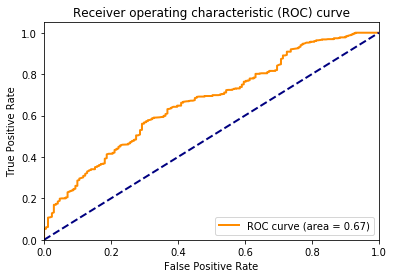

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_scores = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])#False positive rate and true positive rate values 
roc_auc = auc(fpr, tpr) # area under the curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') #naive rule
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()